In [13]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import torch
import torch.nn as nn
import numpy as np
from tqdm.auto import tqdm  # Not needed but very cool!
import matplotlib.pyplot as plt

In [14]:
def load_data(train=True):
    mnist = datasets.MNIST('../data',
                           train=train,
                           download=True, transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
    return mnist


def plot_examples(data):
    #########################
    #### Your Code here  ####
    #########################
    #extract data and labels from dataset
    images = data.data
    labels = data.targets

    fig = plt.figure()
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.tight_layout()
        plt.imshow(images[i], cmap='gray', interpolation='none')
        plt.title("Label: {}".format(labels[i]))
        plt.xticks([])
        plt.yticks([])
    fig
    print(type(images))
    print(images.shape)

    #using math functions, extract the information about the dataset
    data_min = images.min().item()
    data_max = images.max().item()
    data_mean = images.float().mean()
    data_shape = images.shape
    data_type = images.dtype

    # Print the statistics
    print(f"Statistics of the MNIST training set:")
    print(f"Minimum value: {data_min}")
    print(f"Maximum value: {data_max}")
    print(f"Mean value: {data_mean}")
    print(f"Shape of the data array: {data_shape}")
    print(f"Data type of the array: {data_type}")


    
def convert_mnist_to_vectors(data):
    '''Converts the ``[28, 28]`` MNIST images to vectors of size ``[28*28]``.
       It outputs mnist_vectors as a array with the shape of [N, 784], where
       N is the number of images in data.
    '''

    mnist_vectors = []
    labels = []

    #########################
    #### Your Code here  ####
    #########################
    
    images = data.data
    labels = data.targets 
    mnist_vectors = images.view(images.shape[0], -1) # 60000x784
    mnist_vectors = mnist_vectors / 255.0  # Normalize from [0,255] to [0, 1]
    # Normalize from [0, 1] to [-1, 1]
    mnist_vectors =  (2 * mnist_vectors) - 1

    return mnist_vectors, labels



def do_pca(data):
    '''Returns matrix [784x784] whose columns are the sorted eigenvectors.
       Eigenvectors (prinicipal components) are sorted according to their
       eigenvalues in decreasing order.
    '''

    mnist_vectors, labels = convert_mnist_to_vectors(data)
    #     prepare_data(mnist_vectors)

    # compute covariance matrix of data with shape [784x784]
    cov = np.cov(mnist_vectors.T)

    # compute eigenvalues and vectors
    eigVals, eigVec = np.linalg.eig(cov)

    # sort eigenVectors by eigenValues
    sorted_index = eigVals.argsort()[::-1]
    eigVals = eigVals[sorted_index]
    sorted_eigenVectors = eigVec[:, sorted_index]
    print(type(sorted_eigenVectors), sorted_eigenVectors.shape)
    return sorted_eigenVectors.astype(np.float32).T


def plot_pcs(sorted_eigenVectors, num=10):
    '''Plots the first ``num`` eigenVectors as images.'''

    #########################
    #### Your Code here  ####
    #########################

    fig, axes = plt.subplots(1, num, figsize=(15, 1.5)) 
    for i, ax in enumerate(axes):
        # Reshape the flat vector of the ith principal component to 28x28
        pc_image = sorted_eigenVectors[i].reshape(28, 28)
        
        # Plot the reshaped principal component
        ax.imshow(pc_image, cmap='gray')
        ax.axis('off')  # Turn off axis numbering
        ax.set_title(f'PC {i+1}')
    
    plt.show()
    

def plot_projection(sorted_eigenVectors, data):
    '''Projects ``data`` onto the first two ``sorted_eigenVectors`` and makes
    a scatterplot of the resulting points'''

    #########################
    #### Your Code here  ####
    #########################
    data,labels = convert_mnist_to_vectors(data)
    two_pcs = sorted_eigenVectors[:2]
    new_coordinates = np.matmul(data, two_pcs.T) # new coordinates after projection

    plt.figure(figsize=(10,8))
    scatter = plt.scatter(new_coordinates[:,0],new_coordinates[:,1],c=labels,cmap='tab10',alpha=0.6)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.title('Projection of MNIST training data on first two PCs')
    plt.colorbar(scatter)
    plt.show





<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
Statistics of the MNIST training set:
Minimum value: 0
Maximum value: 255
Mean value: 33.31842041015625
Shape of the data array: torch.Size([60000, 28, 28])
Data type of the array: torch.uint8
Data shape tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]])
<class 'numpy.ndarray'> (784, 784)


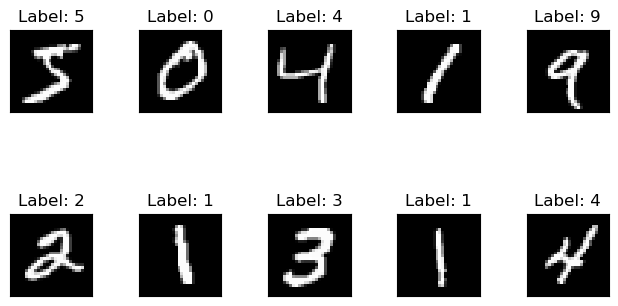

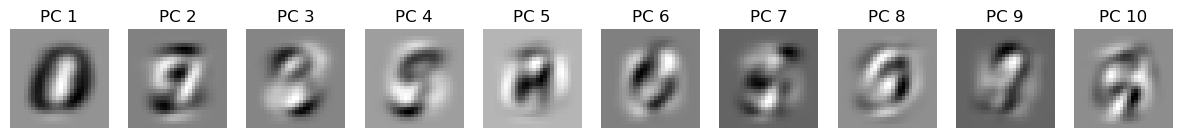

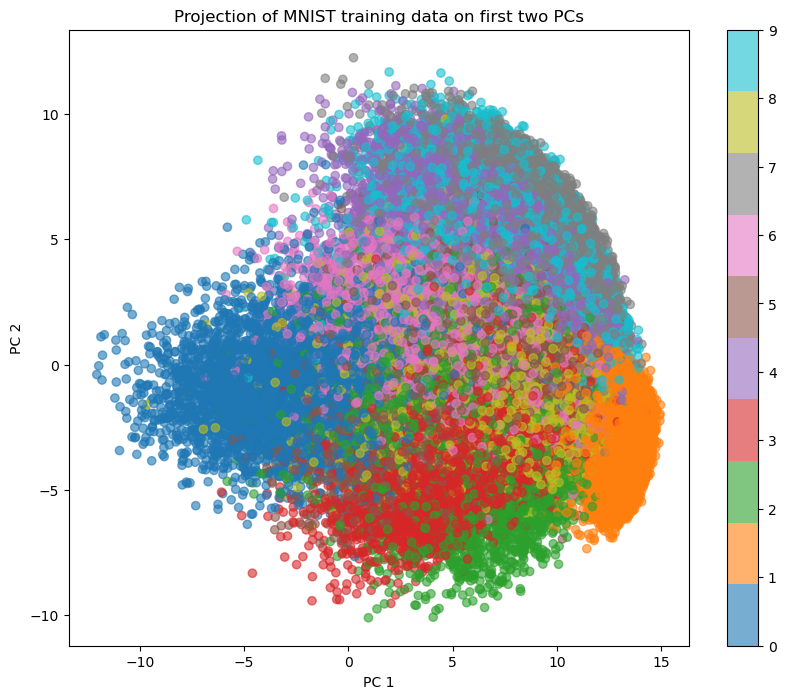

In [15]:
# You can run this part of the code from the terminal using python ex1.py
# dataloading
data = load_data()

# subtask 1
plot_examples(data)

# subtask 2
mnist_vectors, labels = convert_mnist_to_vectors(data)
#Comment in once the above function is implemented, to check the shape of your dataset
print('Data shape', mnist_vectors)

# subtask 3
pcs = do_pca(data)

# subtask 3
plot_pcs(pcs)

# subtask 4
plot_projection(pcs,data)


# Comments regarding task 2.3

When plotting the PCs we can see which pixels have a higher weighting when predicting the label of an image. We can see that the darker pixels have a higher weighting and the bright pixels have a smaller weighting. This however isn't completely clear to see except the 0. The ideal scenario would be to have a clear distinction between the darker and brighter pixels but we can see that in some PCs this isn't the case

# Comments regarding task 2.4

We can see that MNIST classification isn't easy because we have a lot of overlapping classes (even though the PCs were able to hold some information). You can see that some labels are well separated like 0 and 1 but there are a lot of overlaps. So the MNIST dataset isn't easy to solve with simple ML algorithms.